# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = "data/ovariancancer_obs.csv"
ovariancancer_grp_path = "data/ovariancancer_grp.csv"

A = np.genfromtxt(ovariancancer_obs_path, delimiter=",").transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != ""]

How many patients? How many features?

In [66]:
A.shape
# 216 patients (each column is a patient)
# 4000 features per patient
n_patients = A.shape[1]
n_features = A.shape[0]
n_patients, n_features

(216, 4000)

How many patiens with and without cancer are there in the dataset?

In [67]:
bin_grp = np.where(grp == "Cancer", 1, 0)
bin_grp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
with_cancer = np.count_nonzero(bin_grp)
without_cancer = len(bin_grp) - with_cancer

with_cancer, without_cancer

(121, 95)

Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

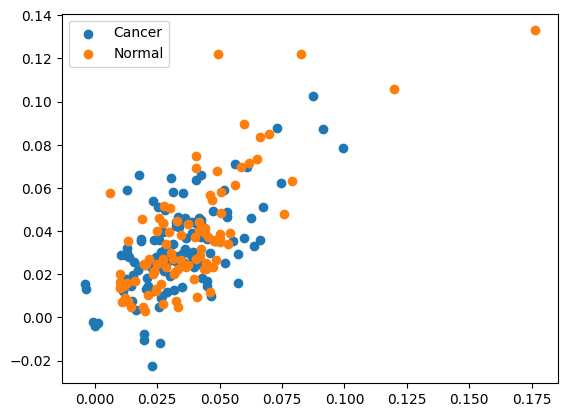

In [69]:
# p1 = np.random.randint(0, 3999 + 1)
# p2 = np.random.randint(0, 3999 + 1)

# p1, p2

p1 = 0
p2 = 1

fig, ax = plt.subplots(1, 1)

ax.scatter(A[p1, grp == "Cancer"], A[p2, grp == "Cancer"], label="Cancer")
ax.scatter(A[p1, grp == "Normal"], A[p2, grp == "Normal"], label="Normal")
ax.legend()

Repeat the previous point, this time by considering three proteins.

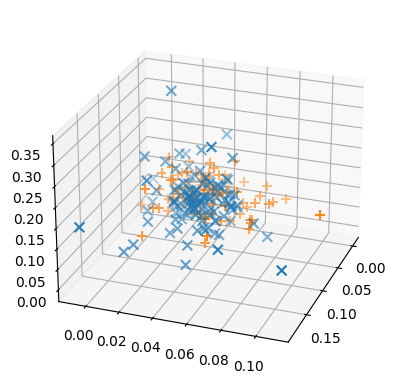

In [81]:
p1 = 1000
p2 = 2000
p3 = 3000

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    A[p1, grp == "Cancer"],
    A[p2, grp == "Cancer"],
    A[p3, grp == "Cancer"],
    marker="x",
    s=50,
)
ax.scatter(
    A[p1, grp == "Normal"],
    A[p2, grp == "Normal"],
    A[p3, grp == "Normal"],
    marker="+",
    s=50,
)

ax.view_init(25, 20)

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'explained variance')

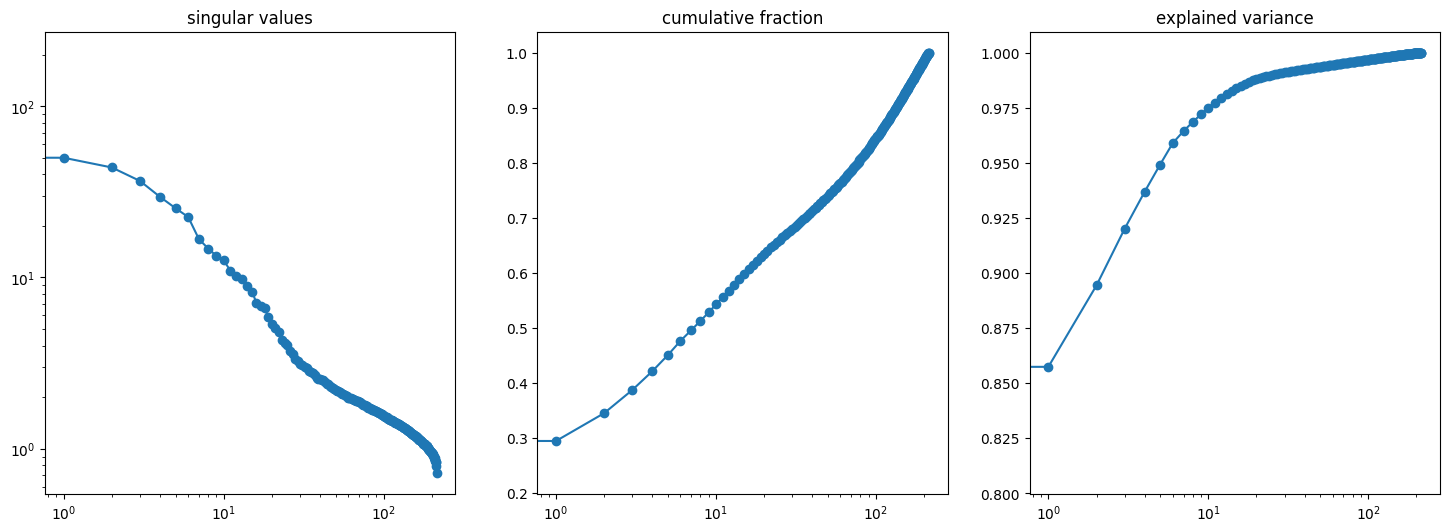

In [78]:
# Compute the mean
Amean = np.mean(A, axis=1)
# Compute the centered data
Abar = A - Amean[:, None]
# Compute the SVD on the centered data
U, s, VT = np.linalg.svd(Abar, full_matrices=False)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# plot all singular values (except last one which is too small, it changes the visualization of the others)
ax[0].loglog(s[:-1], "-o")
ax[0].set_title("singular values")
ax[1].semilogx(np.cumsum(s) / np.sum(s), "-o")
ax[1].set_title("cumulative fraction")
ax[2].semilogx(np.cumsum(s**2) / np.sum(s**2), "-o")
ax[2].set_title("explained variance")

Make a scatterplot of the first two principal components of the patients.

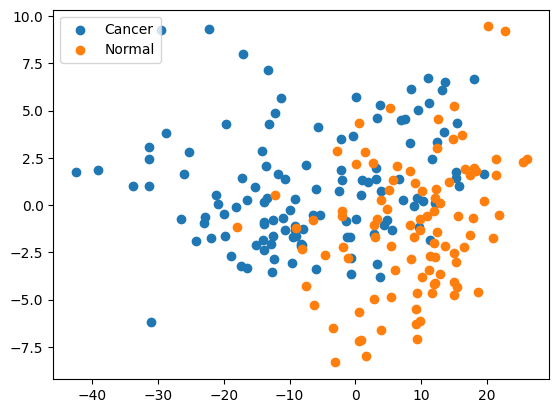

In [72]:
PHI = U.T @ Abar

fig, ax = plt.subplots(1, 1)

ax.scatter(PHI[0, grp == "Cancer"], PHI[1, grp == "Cancer"], label="Cancer")
ax.scatter(PHI[0, grp == "Normal"], PHI[1, grp == "Normal"], label="Normal")
plt.legend()

Make a scatterplot of the first three principal components of the patients.

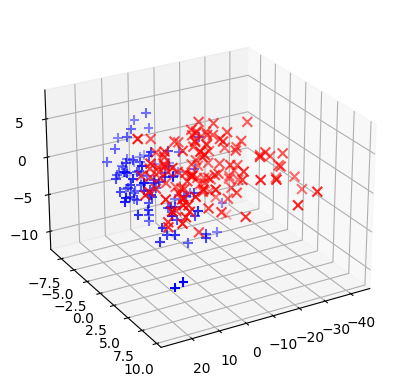

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    PHI[0, grp == "Cancer"],
    PHI[1, grp == "Cancer"],
    PHI[2, grp == "Cancer"],
    marker="x",
    s=50,
    color="r",
)
ax.scatter(
    PHI[0, grp == "Normal"],
    PHI[1, grp == "Normal"],
    PHI[2, grp == "Normal"],
    marker="+",
    s=50,
    color="b",
)

ax.view_init(25, 60)